
ANALYZING OUR GAT MODEL RESULTS
✅ Successfully loaded GAT model results
   Accuracy: 0.841
   Recall: 0.802
   Specificity: 0.848
   F1-Score: 0.603
   MCC: 0.537
   AUC: 0.913

ANALYZING Stack-AVP RESULTS
🚀 Stack-AVP Performance Evaluation
✅ Successfully read CSV file: StackAVP_166.csv
📊 Data Overview: Shape (9297, 3)
Columns: ['Sequence_Name', 'Label', 'Probability']
Valid data: 9297 / 9297 rows

📈 Performance Metrics:
   Accuracy:      0.704
   Specificity:   0.668
   Sensitivity:        0.902
   AUC:           0.860
   F1-Score:      0.479
   MCC:           0.414
📸 Figure saved to: Visualization/Stack_AVP_evaluation.png


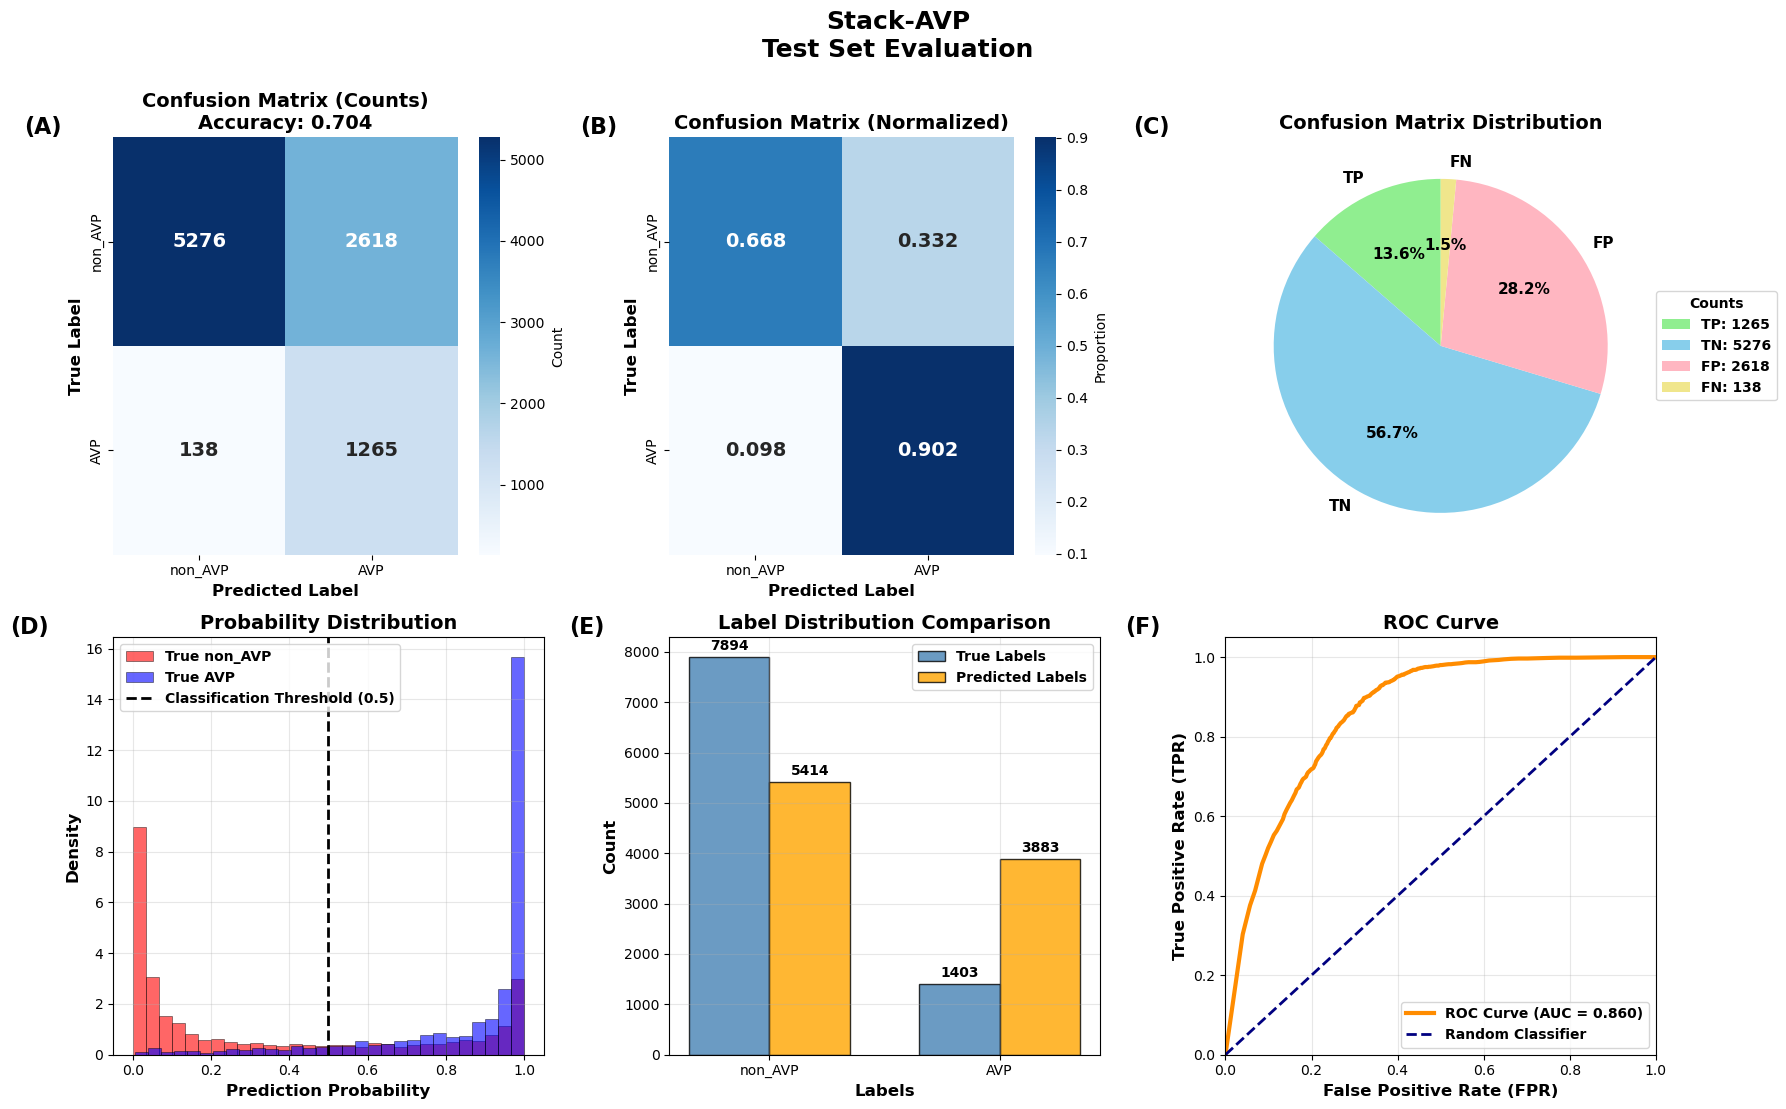


ANALYZING AVP-HNCL (NON-AMP) RESULTS
🚀 AVP-HNCL (non-AMP dataset) Performance Evaluation
✅ Successfully read Excel file: AVP-HNCL_non-AMP_results.xlsx
📊 Data Overview: Shape (9297, 4)
Columns: ['Header', 'Sequence', 'Prediction', 'Probability']
Valid data: 9297 / 9297 rows

📈 Performance Metrics:
   Accuracy:      0.628
   Specificity:   0.580
   Sensitivity:        0.895
   AUC:           0.762
   F1-Score:      0.421
   MCC:           0.341
📸 Figure saved to: Visualization/AVP_HNCL_non_AMP_dataset_evaluation.png


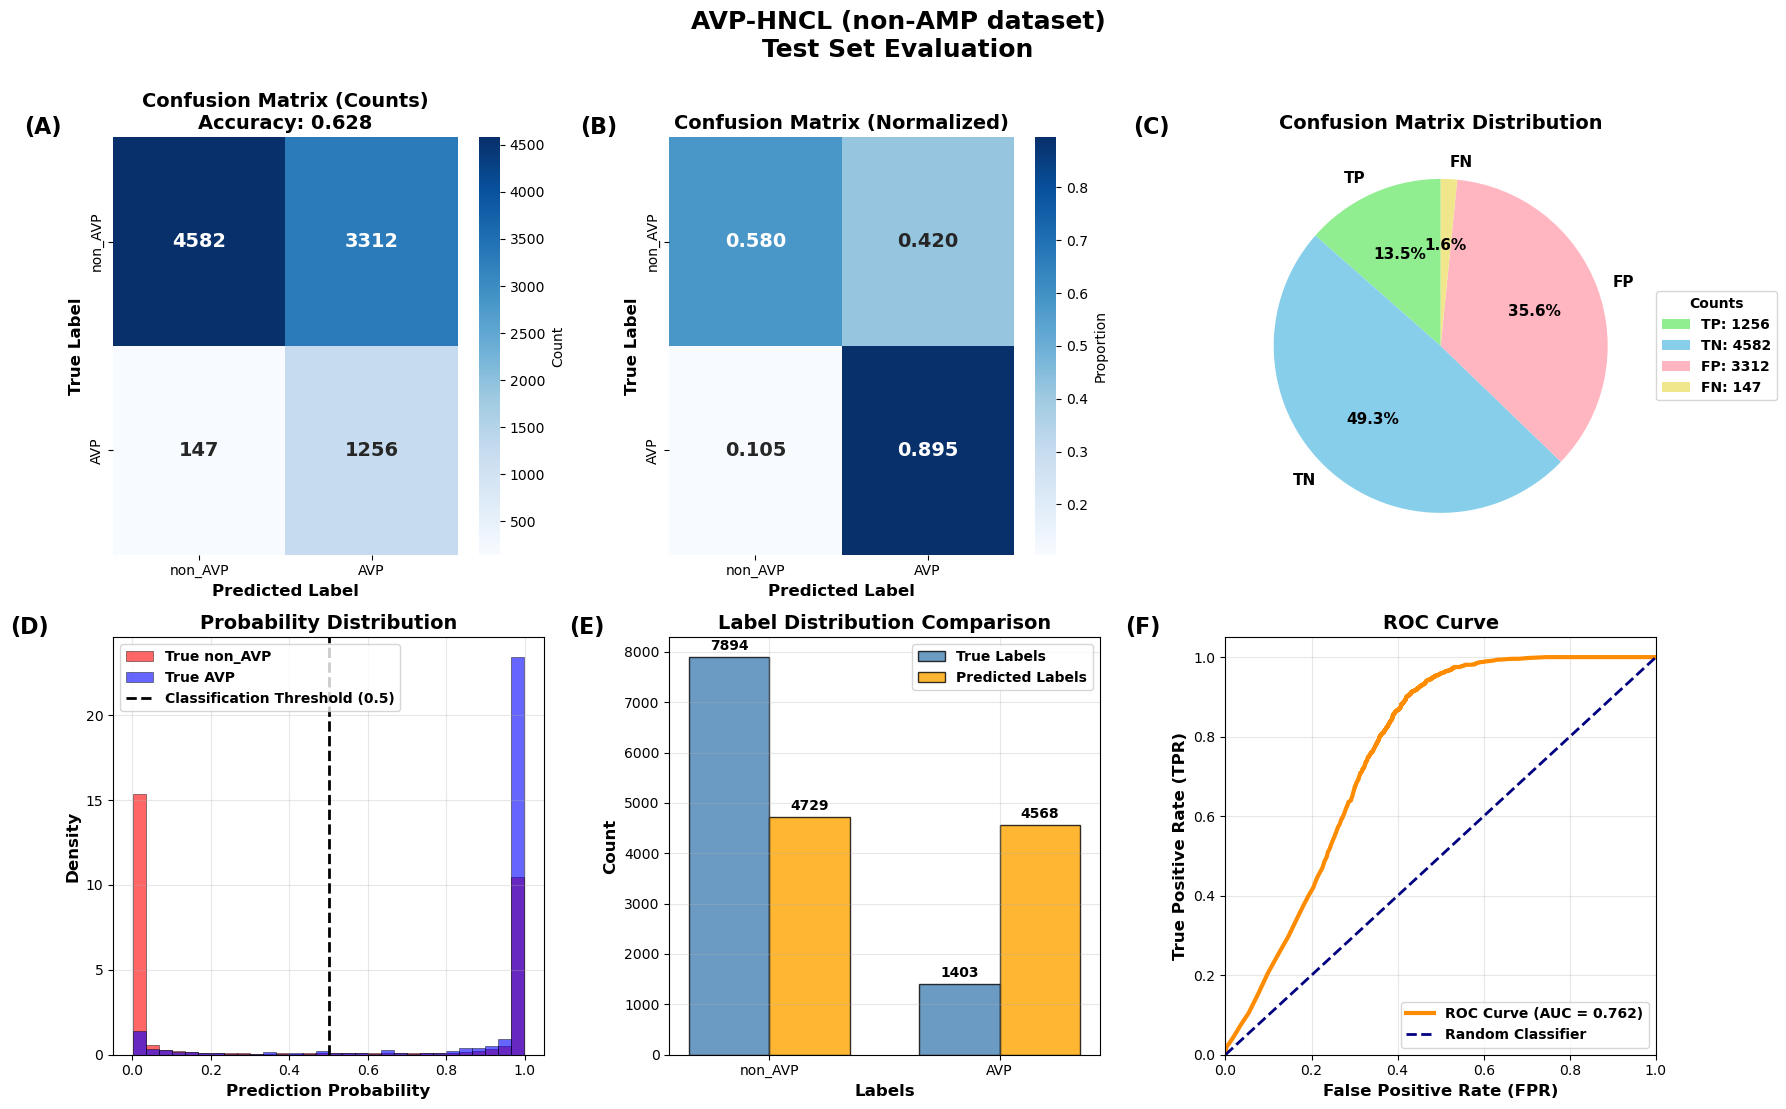


ANALYZING AVP-HNCL (NON-AVP) RESULTS
🚀 AVP-HNCL (non-AVP dataset) Performance Evaluation
✅ Successfully read Excel file: AVP-HNCL_non-AVP_results.xlsx
📊 Data Overview: Shape (9297, 4)
Columns: ['Header', 'Sequence', 'Prediction', 'Probability']
Valid data: 9297 / 9297 rows

📈 Performance Metrics:
   Accuracy:      0.569
   Specificity:   0.535
   Sensitivity:        0.761
   AUC:           0.708
   F1-Score:      0.348
   MCC:           0.212
📸 Figure saved to: Visualization/AVP_HNCL_non_AVP_dataset_evaluation.png


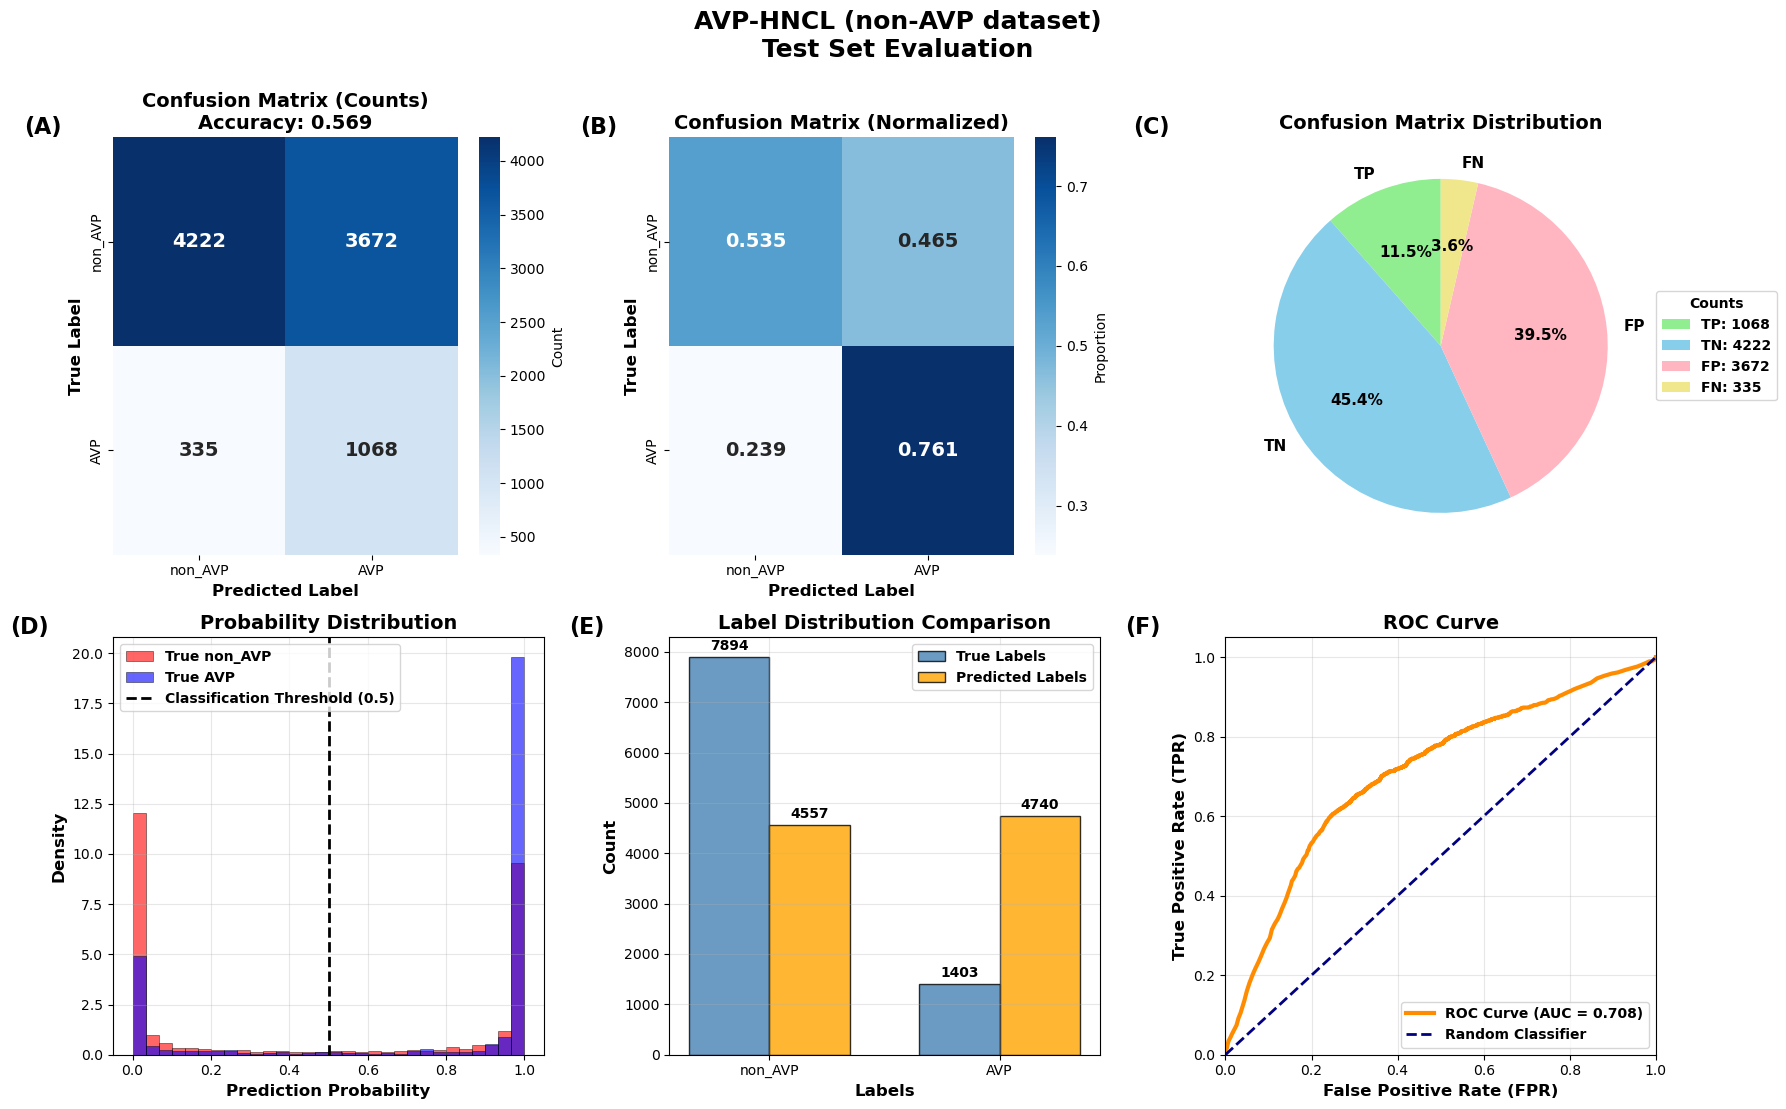


SUMMARY COMPARISON

📊 Performance Comparison Table:
             3-Layer GAT on 4.0A (Our Model)  Stack-AVP  AVP-HNCL (non-AMP)  \
Accuracy                               0.841      0.704               0.628   
Sensitivity                            0.802      0.902               0.895   
Specificity                            0.848      0.668               0.580   
ROC_AUC                                0.913      0.860               0.762   
F1-Score                               0.603      0.479               0.421   
MCC                                    0.537      0.414               0.341   

             AVP-HNCL (non-AVP)  
Accuracy                  0.569  
Sensitivity               0.761  
Specificity               0.535  
ROC_AUC                   0.708  
F1-Score                  0.348  
MCC                       0.212  
📸 Comparison figure saved to: Visualization/models_comparison.png


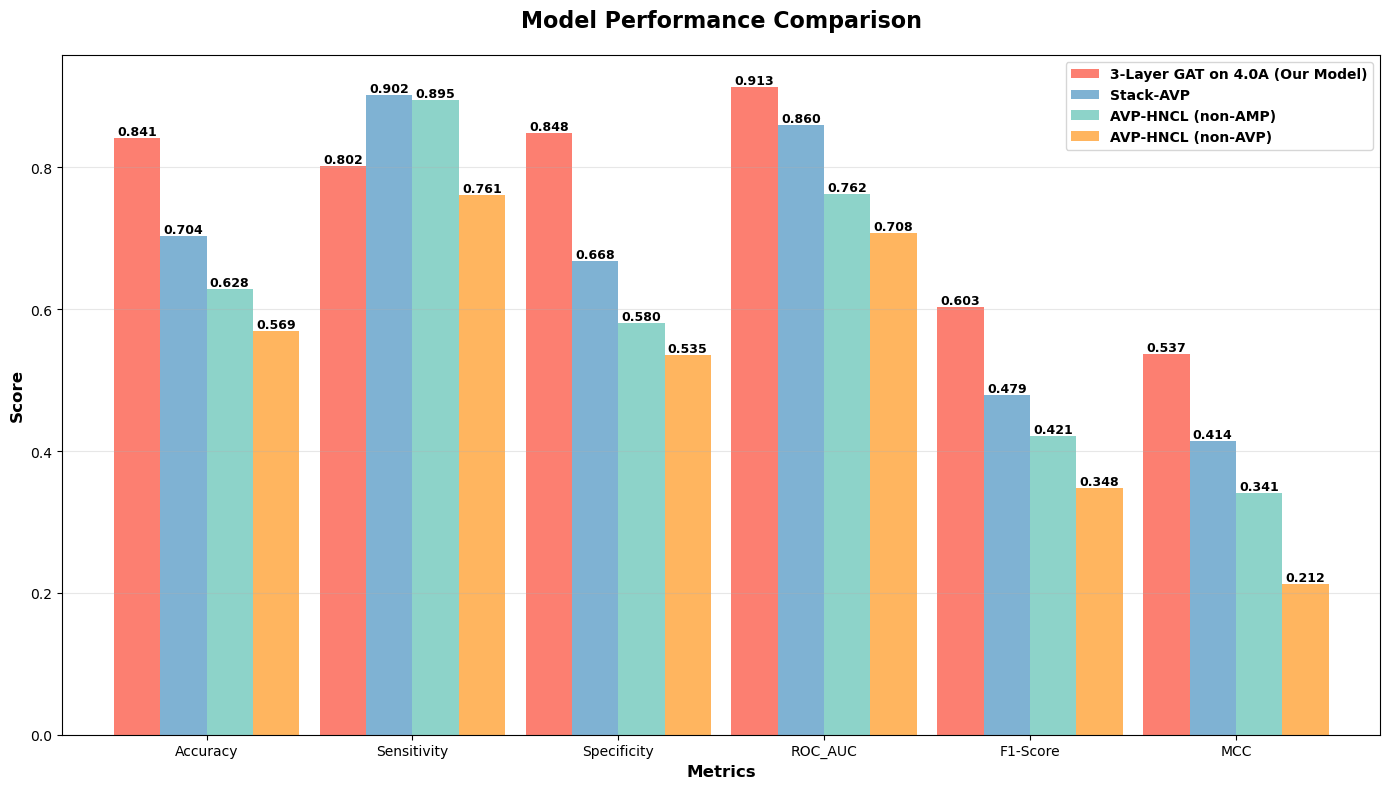


🎯 All evaluations completed!
📁 Results saved in: Visualization


In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 设置中文字体和忽略警告
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore', category=UserWarning)

class ExternalModelEvaluator:
    """外部模型评估器"""
    
    def __init__(self, save_dir="Visualization"):
        self.visualization_dir = Path(save_dir)
        self.visualization_dir.mkdir(parents=True, exist_ok=True)
    
    def calculate_specificity(self, y_true, y_pred):
        """计算特异性 (Specificity)"""
        cm = confusion_matrix(y_true, y_pred, labels=['non_AVP', 'AVP'])
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        return specificity
    
    def create_comprehensive_evaluation_plot(self, y_true, y_pred, y_prob=None, title="Model Evaluation", figsize=(18, 12)):
        """
        创建综合评估可视化，包含6个子图，参考GAT-GCN风格
        """
        # 计算混淆矩阵和指标
        labels = ['non_AVP', 'AVP']
        cm = confusion_matrix(y_true, y_pred, labels=labels)
        
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, pos_label='AVP', zero_division=0)
        recall = recall_score(y_true, y_pred, pos_label='AVP', zero_division=0)
        specificity = self.calculate_specificity(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, pos_label='AVP', zero_division=0)
        
        # 计算TP, TN, FP, FN
        tn, fp, fn, tp = cm.ravel()
        
        # 创建图形
        fig, axes = plt.subplots(2, 3, figsize=figsize)
        fig.suptitle(title, fontsize=18, fontweight='bold', y=0.92, ha='center')
        
        # 定义子图标签
        subplot_labels = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)']
        
        # 1. 混淆矩阵 (计数) - 添加标签 (A)
        self.plot_confusion_matrix_with_accuracy(y_true, y_pred, accuracy, axes[0, 0])
        axes[0, 0].text(-0.15, 1.05, subplot_labels[0], transform=axes[0, 0].transAxes, 
                        fontsize=16, fontweight='bold', va='top', ha='right')
        
        # 2. 归一化混淆矩阵 - 添加标签 (B)
        self.plot_normalized_confusion_matrix(y_true, y_pred, axes[0, 1])
        axes[0, 1].text(-0.15, 1.05, subplot_labels[1], transform=axes[0, 1].transAxes, 
                        fontsize=16, fontweight='bold', va='top', ha='right')
        
        # 3. 混淆矩阵分布饼图 - 添加标签 (C)
        self.plot_confusion_pie_chart(y_true, y_pred, axes[0, 2])
        axes[0, 2].text(-0.15, 1.05, subplot_labels[2], transform=axes[0, 2].transAxes, 
                        fontsize=16, fontweight='bold', va='top', ha='right')
        
        # 4. 概率分布直方图 - 添加标签 (D)
        self.plot_probability_distribution(y_true, y_prob, axes[1, 0])
        axes[1, 0].text(-0.15, 1.05, subplot_labels[3], transform=axes[1, 0].transAxes, 
                        fontsize=16, fontweight='bold', va='top', ha='right')
        
        # 5. 标签分布对比 - 添加标签 (E)
        self.plot_label_distribution(y_true, y_pred, axes[1, 1])
        axes[1, 1].text(-0.15, 1.05, subplot_labels[4], transform=axes[1, 1].transAxes, 
                        fontsize=16, fontweight='bold', va='top', ha='right')
        
        # 6. ROC曲线 - 添加标签 (F)
        self.plot_roc_curve_in_subplot(y_true, y_prob, axes[1, 2])
        axes[1, 2].text(-0.15, 1.05, subplot_labels[5], transform=axes[1, 2].transAxes, 
                        fontsize=16, fontweight='bold', va='top', ha='right')
        
        # 调整布局
        plt.tight_layout(rect=[0, 0, 1, 0.92])
        
        return fig
    
    def plot_confusion_matrix_with_accuracy(self, y_true, y_pred, accuracy, ax):
        """绘制带准确度的混淆矩阵"""
        cm = confusion_matrix(y_true, y_pred, labels=['non_AVP', 'AVP'])
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                   xticklabels=['non_AVP', 'AVP'],
                   yticklabels=['non_AVP', 'AVP'],
                   cbar_kws={'label': 'Count'},
                   annot_kws={'size': 14, 'weight': 'bold'})
        
        ax.set_title(f'Confusion Matrix (Counts)\nAccuracy: {accuracy:.3f}', 
                    fontweight='bold', fontsize=14)
        ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
        ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
    
    def plot_normalized_confusion_matrix(self, y_true, y_pred, ax):
        """绘制归一化混淆矩阵"""
        cm = confusion_matrix(y_true, y_pred, labels=['non_AVP', 'AVP'])
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Blues', ax=ax,
                   xticklabels=['non_AVP', 'AVP'],
                   yticklabels=['non_AVP', 'AVP'],
                   cbar_kws={'label': 'Proportion'},
                   annot_kws={'size': 14, 'weight': 'bold'})
        
        ax.set_title('Confusion Matrix (Normalized)', fontweight='bold', fontsize=14)
        ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
        ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
    
    def plot_confusion_pie_chart(self, y_true, y_pred, ax):
        """绘制混淆矩阵饼图"""
        cm = confusion_matrix(y_true, y_pred, labels=['non_AVP', 'AVP'])
        tn, fp, fn, tp = cm.ravel()
        
        # 计算百分比
        sizes = [tp, tn, fp, fn]
        labels_pie = ['TP', 'TN', 'FP', 'FN']
        
        # 使用与GAT-GCN相同的颜色方案
        colors = ['#90EE90', '#87CEEB', '#FFB6C1', '#F0E68C']  # 浅绿、浅蓝、浅粉、浅黄
        
        # 绘制饼图
        wedges, texts, autotexts = ax.pie(sizes, labels=labels_pie, colors=colors, 
                                         autopct='%1.1f%%', startangle=90, 
                                         textprops={'fontsize': 11, 'fontweight': 'bold'})
        
        ax.set_title('Confusion Matrix Distribution', fontweight='bold', fontsize=14)
        
        # 添加图例
        legend = ax.legend(wedges, [f'{label}: {size}' for label, size in zip(labels_pie, sizes)],
                          title="Counts", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        legend.get_title().set_fontweight('bold')
        for text in legend.get_texts():
            text.set_fontweight('bold')
    
    def plot_probability_distribution(self, y_true, y_prob, ax):
        """绘制预测概率分布"""
        if y_prob is not None:
            # 创建DataFrame便于处理
            df_prob = pd.DataFrame({'True_Label': y_true, 'Probability': y_prob})
            
            avp_probs = df_prob[df_prob['True_Label'] == 'AVP']['Probability']
            non_avp_probs = df_prob[df_prob['True_Label'] == 'non_AVP']['Probability']
            
            # 绘制直方图
            if len(non_avp_probs) > 0:
                ax.hist(non_avp_probs, bins=30, alpha=0.6, label='True non_AVP', 
                       color='red', density=True, edgecolor='black', linewidth=0.5)
            
            if len(avp_probs) > 0:
                ax.hist(avp_probs, bins=30, alpha=0.6, label='True AVP', 
                       color='blue', density=True, edgecolor='black', linewidth=0.5)
            
            # 添加分类阈值线
            ax.axvline(x=0.5, color='black', linestyle='--', linewidth=2,
                      label='Classification Threshold (0.5)')
            
            ax.set_xlabel('Prediction Probability', fontsize=12, fontweight='bold')
            ax.set_ylabel('Density', fontsize=12, fontweight='bold')
            ax.set_title('Probability Distribution', fontweight='bold', fontsize=14)
            legend = ax.legend()
            for text in legend.get_texts():
                text.set_fontweight('bold')
            ax.grid(True, alpha=0.3)
        else:
            ax.text(0.5, 0.5, 'No Probability Data\nAvailable', 
                   ha='center', va='center', transform=ax.transAxes,
                   fontsize=12, fontweight='bold')
            ax.set_title('Probability Distribution', fontweight='bold', fontsize=14)
    
    def plot_label_distribution(self, y_true, y_pred, ax):
        """绘制标签分布对比"""
        true_counts = pd.Series(y_true).value_counts()
        pred_counts = pd.Series(y_pred).value_counts()
        
        labels = ['non_AVP', 'AVP']
        x = np.arange(len(labels))
        width = 0.35
        
        true_values = [true_counts.get(label, 0) for label in labels]
        pred_values = [pred_counts.get(label, 0) for label in labels]
        
        bars1 = ax.bar(x - width/2, true_values, width, label='True Labels', 
                      color='steelblue', alpha=0.8, edgecolor='black', linewidth=1)
        bars2 = ax.bar(x + width/2, pred_values, width, label='Predicted Labels', 
                      color='orange', alpha=0.8, edgecolor='black', linewidth=1)
        
        # 在柱子上添加数值标签
        for bar, value in zip(bars1, true_values):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(true_values + pred_values)*0.01,
                   f'{int(value)}', ha='center', va='bottom', fontweight='bold', fontsize=10)
        
        for bar, value in zip(bars2, pred_values):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(true_values + pred_values)*0.01,
                   f'{int(value)}', ha='center', va='bottom', fontweight='bold', fontsize=10)
        
        ax.set_xlabel('Labels', fontsize=12, fontweight='bold')
        ax.set_ylabel('Count', fontsize=12, fontweight='bold')
        ax.set_title('Label Distribution Comparison', fontweight='bold', fontsize=14)
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        legend = ax.legend()
        for text in legend.get_texts():
            text.set_fontweight('bold')
        ax.grid(True, alpha=0.3)
    
    def plot_roc_curve_in_subplot(self, y_true, y_prob, ax):
        """在子图中绘制ROC曲线"""
        if y_prob is not None:
            try:
                # 将标签转换为二进制
                y_true_binary = (pd.Series(y_true) == 'AVP').astype(int)
                
                # 计算ROC曲线
                fpr, tpr, thresholds = roc_curve(y_true_binary, y_prob)
                auc_score = roc_auc_score(y_true_binary, y_prob)
                
                # 绘制ROC曲线
                ax.plot(fpr, tpr, color='darkorange', linewidth=3, 
                       label=f'ROC Curve (AUC = {auc_score:.3f})')
                ax.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--', 
                       label='Random Classifier')
                
                ax.set_xlim([0.0, 1.0])
                ax.set_ylim([0.0, 1.05])
                ax.set_xlabel('False Positive Rate (FPR)', fontsize=12, fontweight='bold')
                ax.set_ylabel('True Positive Rate (TPR)', fontsize=12, fontweight='bold')
                ax.set_title('ROC Curve', fontweight='bold', fontsize=14)
                legend = ax.legend(loc="lower right", fontsize=10)
                for text in legend.get_texts():
                    text.set_fontweight('bold')
                ax.grid(True, alpha=0.3)
                
            except Exception as e:
                ax.text(0.5, 0.5, f'Cannot calculate ROC\n{str(e)}', 
                       ha='center', va='center', transform=ax.transAxes,
                       fontsize=10, fontweight='bold')
                ax.set_title('ROC Curve', fontweight='bold', fontsize=14)
        else:
            ax.text(0.5, 0.5, 'No Probability Data\nfor ROC Curve', 
                   ha='center', va='center', transform=ax.transAxes,
                   fontsize=12, fontweight='bold')
            ax.set_title('ROC Curve', fontweight='bold', fontsize=14)
    
    def enhanced_evaluate_performance(self, file_path, file_type='csv', model_name="External Model"):
        """
        增强版性能评估函数，支持多种文件格式
        """
        print(f"🚀 {model_name} Performance Evaluation")
        print("=" * 70)
        
        # 读取数据
        if file_type == 'csv':
            try:
                df = pd.read_csv(file_path, on_bad_lines='skip')
                print(f"✅ Successfully read CSV file: {file_path}")
            except Exception as e:
                print(f"❌ Failed to read CSV file: {e}")
                return None
        elif file_type == 'excel':
            try:
                df = pd.read_excel(file_path)
                print(f"✅ Successfully read Excel file: {file_path}")
            except Exception as e:
                print(f"❌ Failed to read Excel file: {e}")
                return None
        else:
            print("❌ Unsupported file type")
            return None
        
        print(f"📊 Data Overview: Shape {df.shape}")
        print(f"Columns: {list(df.columns)}")
        
        # 提取真实标签和预测结果
        if 'Sequence_Name' in df.columns:
            # StackAVP格式
            true_labels = []
            for name in df['Sequence_Name']:
                name_str = str(name).upper()
                if 'TYPE=AVP' in name_str:
                    true_labels.append('AVP')
                elif 'TYPE=NON_AVP' in name_str or 'TYPE=NON-AVP' in name_str:
                    true_labels.append('non_AVP')
                else:
                    true_labels.append('Unknown')
            
            predicted_labels = df['Label'].astype(str).str.strip()
            predicted_labels = predicted_labels.replace({'non-AVP': 'non_AVP'})
            
        elif 'Header' in df.columns:
            # AVP-HNCL格式
            true_labels = []
            for header in df['Header']:
                header_str = str(header).upper()
                if 'TYPE=AVP' in header_str:
                    true_labels.append('AVP')
                elif 'TYPE=NON_AVP' in header_str or 'TYPE=NON-AVP' in header_str:
                    true_labels.append('non_AVP')
                else:
                    true_labels.append('Unknown')
            
            # 转换预测结果
            predicted_labels = []
            for pred in df['Prediction']:
                pred_str = str(pred).strip().lower()
                if pred_str == 'positive':
                    predicted_labels.append('AVP')
                elif pred_str == 'negative':
                    predicted_labels.append('non_AVP')
                else:
                    predicted_labels.append('Unknown')
        else:
            print("❌ Cannot identify data format")
            return None
        
        # 创建分析数据框
        analysis_df = pd.DataFrame({
            'True_Label': true_labels,
            'Predicted_Label': predicted_labels,
            'Probability': df['Probability'] if 'Probability' in df.columns else None
        })
        
        # 过滤有效数据
        valid_labels = ['AVP', 'non_AVP']
        valid_data = analysis_df[
            (analysis_df['True_Label'].isin(valid_labels)) & 
            (analysis_df['Predicted_Label'].isin(valid_labels))
        ].copy()
        
        print(f"Valid data: {len(valid_data)} / {len(analysis_df)} rows")
        
        if len(valid_data) == 0:
            print("❌ No valid data for analysis")
            return None
        
        # 计算评估指标
        y_true = valid_data['True_Label']
        y_pred = valid_data['Predicted_Label']
        y_prob = valid_data['Probability'] if 'Probability' in df.columns else None
        
        # ========== 计算六个核心指标 ==========
        accuracy = accuracy_score(y_true, y_pred)
        specificity = self.calculate_specificity(y_true, y_pred)
        recall = recall_score(y_true, y_pred, pos_label='AVP', zero_division=0)  # Sensitivity/Recall
        f1 = f1_score(y_true, y_pred, pos_label='AVP', zero_division=0)
        mcc = matthews_corrcoef(y_true, y_pred)
        
        # 计算AUC（如果有概率数据）
        auc = None
        if y_prob is not None:
            try:
                y_true_binary = (y_true == 'AVP').astype(int)
                auc = roc_auc_score(y_true_binary, y_prob)
            except Exception as e:
                print(f"⚠️ Cannot calculate AUC: {e}")
                auc = None
        
        # ========== 打印六个核心指标 ==========
        print(f"\n📈 Performance Metrics:")
        print(f"   Accuracy:      {accuracy:.3f}")
        print(f"   Specificity:   {specificity:.3f}")
        print(f"   Sensitivity:        {recall:.3f}")
        if auc is not None:
            print(f"   AUC:           {auc:.3f}")
        else:
            print(f"   AUC:           N/A (no probability data)")
        print(f"   F1-Score:      {f1:.3f}")
        print(f"   MCC:           {mcc:.3f}")
        
        # 创建综合可视化
        fig = self.create_comprehensive_evaluation_plot(
            y_true=y_true, 
            y_pred=y_pred, 
            y_prob=y_prob, 
            title=f"{model_name}\nTest Set Evaluation"
        )
        
        # 保存图片
        safe_model_name = model_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")
        save_path = self.visualization_dir / f'{safe_model_name}_evaluation.png'
        fig.savefig(save_path, dpi=1200, bbox_inches='tight')
        print(f"📸 Figure saved to: {save_path}")
        
        plt.show()
        
        # ========== 返回六个核心指标 ==========
        return {
            'accuracy': accuracy,
            'specificity': specificity,
            'recall': recall,
            'auc': auc if auc is not None else 0.0,  # 如果没有AUC则设为0
            'f1_score': f1,
            'mcc': mcc,
            'total_samples': len(valid_data)
        }

# 主函数
def main():
    """主评估函数"""
    # 创建评估器
    evaluator = ExternalModelEvaluator()
    
    # 分析文件 - 将GAT模型放在第一位
    results_dict = {}
    
    # 1. 首先添加我们的GAT模型结果
    print("\n" + "="*80)
    print("ANALYZING OUR GAT MODEL RESULTS")
    print("="*80)
    try:
        gat_results_path = "../4_Results_TS_RS/GAT_Test_4.0A/3Layer_GAT/test_metrics.csv"
        gat_df = pd.read_csv(gat_results_path)
        
        # 提取GAT模型的指标（假设CSV包含这些列）
        gat_results = {
            'accuracy': gat_df['accuracy'].iloc[0],
            'recall': gat_df['recall'].iloc[0],
            'specificity': gat_df['specificity'].iloc[0],
            'f1_score': gat_df['f1'].iloc[0],
            'mcc': gat_df['mcc'].iloc[0],
            'auc': gat_df['auc'].iloc[0],
            'total_samples': len(gat_df)
        }
        results_dict['3-Layer GAT on 4.0A (Our Model)'] = gat_results
        print("✅ Successfully loaded GAT model results")
        print(f"   Accuracy: {gat_results['accuracy']:.3f}")
        print(f"   Recall: {gat_results['recall']:.3f}")
        print(f"   Specificity: {gat_results['specificity']:.3f}")
        print(f"   F1-Score: {gat_results['f1_score']:.3f}")
        print(f"   MCC: {gat_results['mcc']:.3f}")
        print(f"   AUC: {gat_results['auc']:.3f}")
        
    except Exception as e:
        print(f"❌ Failed to load GAT model results: {e}")
    
    # 2. StackAVP
    print("\n" + "="*80)
    print("ANALYZING Stack-AVP RESULTS")
    print("="*80)
    stackavp_results = evaluator.enhanced_evaluate_performance(
        "StackAVP_166.csv", 
        file_type='csv', 
        model_name="Stack-AVP"
    )
    if stackavp_results:
        results_dict['Stack-AVP'] = stackavp_results
    
    # 3. AVP-HNCL (non-AMP)
    print("\n" + "="*80)
    print("ANALYZING AVP-HNCL (NON-AMP) RESULTS")
    print("="*80)
    avp_hncl_amp_results = evaluator.enhanced_evaluate_performance(
        "AVP-HNCL_non-AMP_results.xlsx", 
        file_type='excel', 
        model_name="AVP-HNCL (non-AMP dataset)"
    )
    if avp_hncl_amp_results:
        results_dict['AVP-HNCL (non-AMP)'] = avp_hncl_amp_results
    
    # 4. AVP-HNCL (non-AVP)
    print("\n" + "="*80)
    print("ANALYZING AVP-HNCL (NON-AVP) RESULTS")
    print("="*80)
    avp_hncl_avp_results = evaluator.enhanced_evaluate_performance(
        "AVP-HNCL_non-AVP_results.xlsx", 
        file_type='excel', 
        model_name="AVP-HNCL (non-AVP dataset)"
    )
    if avp_hncl_avp_results:
        results_dict['AVP-HNCL (non-AVP)'] = avp_hncl_avp_results
    
    # 汇总比较
    print("\n" + "="*80)
    print("SUMMARY COMPARISON")
    print("="*80)
    
    if len(results_dict) >= 2:
        # ========== 创建六个指标的比较表格，按照新的指定顺序 ==========
        comparison_data = {}
        for model_name, results in results_dict.items():
            comparison_data[model_name] = [
                results['accuracy'],      # Accuracy
                results['recall'],        # Recall (Sensitivity)  
                results['specificity'],   # Specificity
                results['auc'],          # ROC_AUC (第四位)
                results['f1_score'],      # F1-Score (第五位)
                results['mcc']           # MCC (第六位)
            ]
        
        # ========== 使用新的六个核心指标顺序 ==========
        comparison_df = pd.DataFrame(comparison_data, 
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'ROC_AUC', 'F1-Score', 'MCC'])
        
        print("\n📊 Performance Comparison Table:")
        print(comparison_df.round(3))
        
        # 创建比较图表 - SCI风格浅色系
        fig, ax = plt.subplots(1, 1, figsize=(14, 8))
        
        # 使用SCI风格的浅色系颜色，确保第一个颜色给GAT模型
        sci_colors = ["#fc7f71", "#7fb2d3", "#8dd3c9", "#ffb55f"]
        
        bars = comparison_df.plot(kind='bar', ax=ax, width=0.9, color=sci_colors[:len(comparison_df.columns)])  # 增加柱子宽度
        ax.set_title('Model Performance Comparison', fontsize=16, fontweight='bold', pad=20)
        ax.set_ylabel('Score', fontweight='bold', fontsize=12)
        ax.set_xlabel('Metrics', fontweight='bold', fontsize=12)
        
        # 图例设置 - 移到右上角
        legend = ax.legend(title='', loc='upper right', fontsize=10)  # 改为右上角
        legend.get_title().set_fontweight('bold')
        for text in legend.get_texts():
            text.set_fontweight('bold')

        # ✅ 添加数值标签在每个柱子上，保留三位小数
        for container in ax.containers:
            ax.bar_label(container, fmt='%.3f', fontsize=9, fontweight='bold')

        ax.grid(True, alpha=0.3, axis='y')
        
        # 横坐标不旋转
        plt.xticks(rotation=0)
        plt.tight_layout()

        # 保存比较图表
        comparison_save_path = evaluator.visualization_dir / 'models_comparison.png'
        fig.savefig(comparison_save_path, dpi=1200, bbox_inches='tight')
        print(f"📸 Comparison figure saved to: {comparison_save_path}")

        plt.show()
    
    print(f"\n🎯 All evaluations completed!")
    print(f"📁 Results saved in: {evaluator.visualization_dir}")

if __name__ == "__main__":
    main()